# Project: Ridesharing Data Statistical Analysis (Zuber)

## Objective
To analyze taxi and competitor ride data in **Chicago** to identify passenger usage patterns, examine **neighborhood destination preferences**, and test the **impact of external factors (weather)** on trip duration for the new ridesharing company Zuber.

## Scope of Analysis

### 1. Exploratory Data Analysis (EDA)
* Analyze and visualize **ride volume** by taxi company.
* Identify and chart the **top 10 neighborhoods** in Chicago by trip destination volume.

### 2. Hypothesis Testing
* Test whether the **average duration of rides** between the **Loop and O'Hare Airport** is affected by **rainy Saturdays**.
* Formulate null and alternative hypotheses and select the appropriate statistical criterion.

## Methodology
The project involves data preprocessing (type checking, value handling), visualizations (bar charts), and statistical hypothesis testing (Student's t-test).

## Evaluation Criteria (Focus)
The project will be evaluated based on the correct data retrieval and grouping, the **clear hypothesis formulation**, the **justification of the chosen statistical test**, and the robustness of the conclusions.

# 1. Exploratory Data Analysis (EDA)

# 1.1 Import libraries and files

In [1]:
import pandas as pd
import matplotlib.pyplot as plt  
from scipy import stats

In [2]:
df_trips = pd.read_csv('/datasets/project_sql_result_01.csv')
df_destinations = pd.read_csv('/datasets/project_sql_result_04.csv')

# 1.2 Initial Data Exploration

In [3]:
# View the first 5 rows of the DataFrame
print(df_trips.head())
print(df_destinations.head())


                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                Medallion Leasing         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000


# 1.3 Verify Data Types

No conversion is necessary

df_trips:
company_name: object — OK
trips_amount: int64 — OK

df_destinations:
dropoff_location_name: object — OK
average_trips: float64 — OK

# 1.4 Identify the top 10 neighborhoods in terms of destinations

In [4]:
# Sort the neighborhoods by average trips (from highest to lowest)
top10_destinations = df_destinations.sort_values(by="average_trips", ascending=False).head(10)


In [5]:
# Display the top 10 neighborhoods
print("Top 10 neighborhoods as a destination (in average trips):")
print(top10_destinations)

Top 10 bairros como destino (em média de corridas):
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


# 1.5 Visualize Trip Volume: Companies and Top 10 Destinations Chart

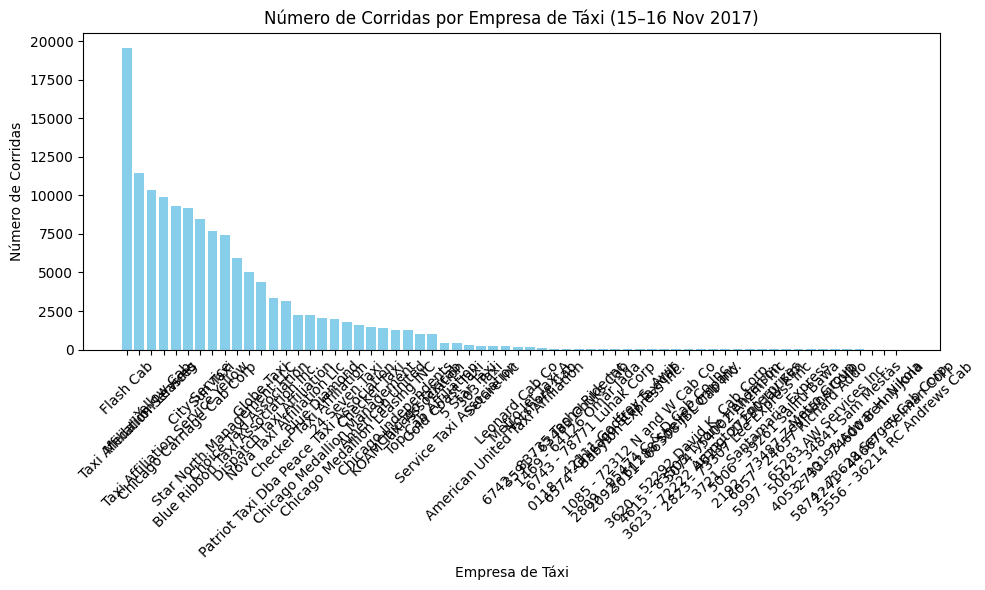

In [6]:
# Bar chart with taxi companies and their trips
plt.figure(figsize=(10, 6))
plt.bar(df_trips['company_name'], df_trips['trips_amount'], color='skyblue')
plt.title('Number of Trips by Taxi Company (Nov 15–16, 2017)')
plt.xlabel('Taxi Company')
plt.ylabel('Total Number of Rides')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


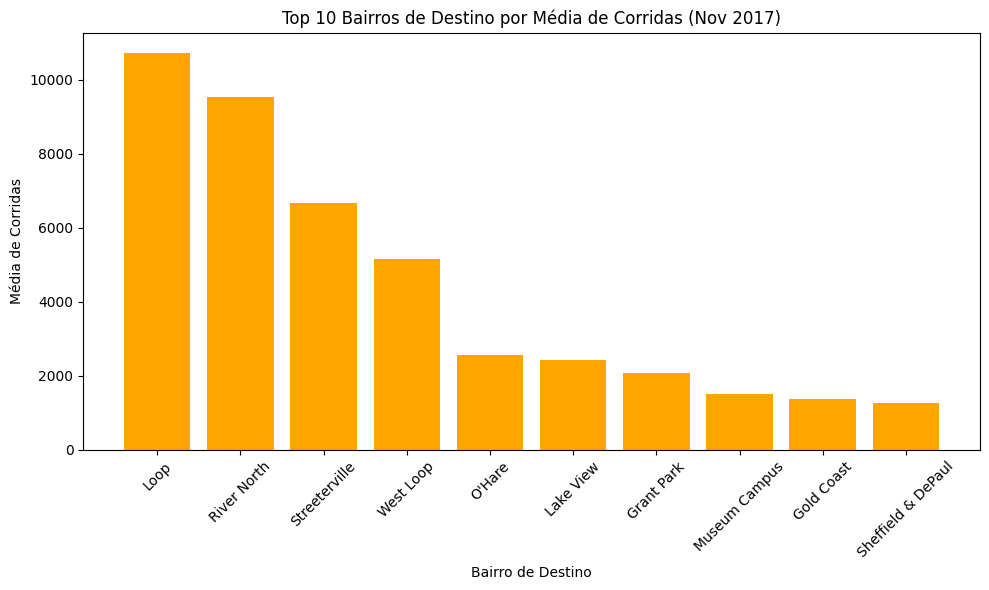

In [7]:
## Bar Chart: Top 10 Destination Neighborhoods
plt.figure(figsize=(10, 6))
plt.bar(top10_destinations['dropoff_location_name'], top10_destinations['average_trips'], color='orange')
plt.title('Top 10 Destination Neighborhoods (Average Daily Trips, Nov 2017) ')
plt.xlabel('Destination Neighborhood')
plt.ylabel('Average Daily Trips')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 1.6 Conclusions

The analysis of the two charts shows that between November 15 and 16, 2017, Flash Cab was responsible for the highest number of trips in Chicago, with a significant difference compared to other companies, which may indicate greater coverage in the city or passenger preference. Regarding destinations, we observe that neighborhoods like Loop, River North, and Streeterville received the most trips on average during the month of November. This suggests that these regions concentrate intense activities, such as commercial, tourist areas, or areas with a high daily flow of people.

# 2.  Testing Hypotheses

# 2.1 Import file

In [8]:
df_weather_trips = pd.read_csv('/datasets/project_sql_result_07.csv')

# 2.2 Data Overview for Hypothesis Test

In [9]:
print(df_weather_trips.head())

              start_ts weather_conditions  duration_seconds
0  2017-11-25 16:00:00               Good            2410.0
1  2017-11-25 14:00:00               Good            1920.0
2  2017-11-25 12:00:00               Good            1543.0
3  2017-11-04 10:00:00               Good            2512.0
4  2017-11-11 07:00:00               Good            1440.0


# 2.3 Verify Data Types

start_ts: datetime64[ns] → already correctly converted.

weather_conditions: object with 'Good' and 'Bad' values.

duration_seconds: float64 — appropriate for mean calculations and statistical tests. Possible invalid data: there is at least one trip with a duration equal to 0 seconds, which is likely an error.

In [10]:
df_weather_trips['duration_seconds'].describe()

count    1068.000000
mean     2071.731273
std       769.461125
min         0.000000
25%      1438.250000
50%      1980.000000
75%      2580.000000
max      7440.000000
Name: duration_seconds, dtype: float64

In [11]:
# # View rows with duration 0
df_weather_trips[df_weather_trips['duration_seconds'] == 0]

,start_ts,weather_conditions,duration_seconds
163,2017-11-11 09:00:00,Good,0.0
168,2017-11-11 07:00:00,Good,0.0
204,2017-11-18 19:00:00,Good,0.0
552,2017-11-04 01:00:00,Good,0.0
801,2017-11-04 09:00:00,Good,0.0
1063,2017-11-25 11:00:00,Good,0.0


In [12]:
# # Remove rows with duration 0
df_weather_trips = df_weather_trips[df_weather_trips['duration_seconds'] != 0]

In [13]:
print((df_weather_trips['duration_seconds'] == 0).sum())

0


# 2.4 Hypothesis Test

H₀ (Null Hypothesis): The average duration is the same on rainy Saturdays and non-rainy Saturdays.

H₁ (Alternative Hypothesis): The average duration changes (is different) between rainy Saturdays and non-rainy Saturdays.

alpha = 0.05

In [14]:
# H₀: The average durations are equal in both groups (rain vs. good weather)
# Select Saturdays only
df_weather_trips['start_ts'] = pd.to_datetime(df_weather_trips['start_ts'])
df_saturdays = df_weather_trips[df_weather_trips['start_ts'].dt.dayofweek == 5]

In [15]:
# Split the groups
group_good = df_saturdays[df_saturdays['weather_conditions'] == 'Good']['duration_seconds']
group_bad = df_saturdays[df_saturdays['weather_conditions'] == 'Bad']['duration_seconds']


In [16]:
# Define alpha
alpha = 0.05

In [21]:
# Calculate variances
var_good = group_good.var()
var_bad = group_bad.var()

In [2]:
print("# Calculate variances:", var_good)
print("Variance with rain:", var_bad)

NameError: name 'var_good' is not defined

In [23]:
# Check if the variances are similar (difference less than 10%)
equal_var = abs(var_good - var_bad) / max(var_good, var_bad) < 0.1


In [24]:
# Apply t-test
t_stat, p_value = stats.ttest_ind(group_good, group_bad, equal_var=equal_var)

In [25]:
# Show statistics
print("Média clima bom:", group_good.mean())
print("Média com chuva:", group_bad.mean())
print("Valor-p:", p_value)


Média clima bom: 2013.2789115646258
Média com chuva: 2427.2055555555557
Valor-p: 1.3318772977743245e-11


In [26]:
# Null hypothesis check
if p_value >= alpha:
    print("Não rejeitamos H₀: as durações médias são iguais.")
else:
    print("Rejeitamos H₀: as durações são diferentes.")


Rejeitamos H₀: as durações são diferentes.


In [19]:
# H₁: The average durations are different between the groups

# Show statistics for both groups
print("Média em clima bom:", group_good.mean())
print("Média com chuva:", group_bad.mean())
print("Valor-p:", p_value)

Média em clima bom: 2013.2789115646258
Média com chuva: 2427.2055555555557
Valor-p: 2.4173590471585584e-11


In [27]:
# Alternative hypothesis check

if p_value < alpha:
    print("We accept H₁: there is a significant difference in the averages.")
else:
    print("There is no evidence to accept H1.")

Aceitamos H₁: existe diferença significativa nas médias.


# 2.6 Conclusions

A análise dos dados mostrou que a duração das corridas de táxi do Loop até o Aeroporto O'Hare é maior nos sábados chuvosos. Após limpar os dados e aplicar um teste estatístico, foi confirmada uma diferença significativa entre os dois grupos: em dias de clima bom, a média foi menor, enquanto em dias de chuva as corridas duraram mais. O valor-p foi muito baixo, o que nos levou a rejeitar a hipótese nula e aceitar que o clima influencia diretamente no tempo das viagens.